In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('C:\\Users\\admin\\Desktop\\tidyed_final.csv')

In [3]:
pds = data[data.iloc[:,5] == 1] #set period
pds = pds.drop(['station_num','month','day','hour','minute','period'],axis=1)
pds

,stock,rests_num,lent_count,return_count,empty,total_air_status,PM10_level,avg_temp,avg_humi,wind_speed,...,avg_bikestn_dis,sd_bikestn_dis,nrt_bikestn_dis,nrt_busstn_dis,nrt_sub_dis,flo1030_ratio,live1030_ratio,compop,com1030_ratio,kosdaq
0,0,10,0,0,True,56,44,25.3,89.7,0.788457,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
4,1,10,1,0,True,69,58,28.0,73.7,0.741937,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
8,4,10,0,0,False,49,37,27.0,88.8,0.530628,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
12,5,10,2,3,False,75,65,28.3,77.5,0.262364,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
16,8,10,0,0,False,59,34,27.4,72.0,0.405465,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
20,4,10,1,0,False,65,54,30.2,69.6,0.470004,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
24,15,10,2,0,False,91,62,30.0,69.3,0.530628,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
28,7,10,3,1,False,79,72,32.6,66.1,0.788457,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
32,4,10,0,0,False,87,79,31.3,75.0,0.262364,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5
36,6,10,3,2,False,87,53,27.5,81.8,-1.203973,...,3424.356902,2355.765853,5.985658,4.537376,6.335796,0.619301,0.267761,26124.50173,0.301428,5


In [5]:
X = pds.iloc[:,5:]
y = pds['return_count'] #return_count or lent_count

#### correlation

In [9]:
features = X.columns.tolist() #variable name list
target = y.name 

In [7]:
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [8]:
#correlations with return_count(y)
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
avg_alt vs return_count,-0.327694
nrt_sub_dis vs return_count,-0.219243
compop vs return_count,0.179392
flo_10 vs return_count,0.176631
flo_30 vs return_count,0.172994
avg_humi vs return_count,-0.171026
flo_40 vs return_count,0.170556
flo_50 vs return_count,0.160050
avg_bikestn_dis vs return_count,-0.158829
flo_20 vs return_count,0.157842


#### XGBoost

In [10]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [13]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7,seed=1)

In [14]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=0.75)

In [15]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.2654893376604379


In [16]:
from sklearn.metrics import mean_squared_error
import math
testScore=math.sqrt(mean_squared_error(y_test,predictions))
print(testScore)

1.4066706073728092


##### feature importance

In [22]:
importance = xgb.feature_importances_

In [23]:
import_lst = importance.tolist()

In [28]:
dictionary = dict(zip(features,import_lst))
dictionary

{'total_air_status': 0.14416304230690002,
 'PM10_level': 0.085938960313797,
 'avg_temp': 0.10260112583637238,
 'avg_humi': 0.09842519462108612,
 'wind_speed': 0.0672927126288414,
 'cumu_rain': 0.019726591184735298,
 'road_link_count_in_dong': 0.0204329676926136,
 'flo_10': 0.01591423712670803,
 'flo_20': 0.008684271015226841,
 'flo_30': 0.004300583619624376,
 'flo_40': 0.0025346435140818357,
 'flo_50': 0.0028047284577041864,
 'flo_60': 0.003708474338054657,
 'livpop_m_1014': 0.00887125264853239,
 'livpop_m_1519': 0.005256269127130508,
 'livpop_m_2024': 0.0060769119299948215,
 'livpop_m_2529': 0.0061288513243198395,
 'livpop_m_3034': 0.0050069596618413925,
 'livpop_m_3539': 0.00392661988735199,
 'livpop_m_4': 0.004622607957571745,
 'livpop_m_4044': 0.0019217584049329162,
 'livpop_m_4549': 0.0014646915951743722,
 'livpop_m_5054': 0.001973697915673256,
 'livpop_m_509': 0.0021814554929733276,
 'livpop_m_5559': 0.0017971039051190019,
 'livpop_m_6064': 0.0014335279120132327,
 'livpop_m_6569'

In [27]:
import operator
sorted_x = sorted(dictionary.items(), key=operator.itemgetter(1))
sorted_x #feature_importances_sorted

[('livpop_w_5559', 0.00047784263733774424),
 ('livpop_w_4549', 0.0004986184067092836),
 ('livpop_w_5054', 0.0005609457148239017),
 ('livpop_w_509', 0.0006440487923100591),
 ('livpop_w_7074', 0.0007583154947496951),
 ('livpop_w_4044', 0.0008102549472823739),
 ('livpop_w_6569', 0.0009349095053039491),
 ('livpop_w_7579', 0.0009556852746754885),
 ('livpop_w_3539', 0.0011738308239728212),
 ('livpop_w_8084', 0.0013088732957839966),
 ('livpop_w_4', 0.001391976373270154),
 ('livpop_m_6064', 0.0014335279120132327),
 ('livpop_m_4549', 0.0014646915951743722),
 ('livpop_m_I00', 0.0015166309894993901),
 ('livpop_w_1519', 0.0015893462114036083),
 ('livpop_w_6064', 0.0016412856057286263),
 ('livpop_m_7579', 0.0016620613168925047),
 ('livpop_m_7074', 0.0017451643943786621),
 ('livpop_w_8589', 0.0017659402219578624),
 ('livpop_m_5559', 0.0017971039051190019),
 ('livpop_m_4044', 0.0019217584049329162),
 ('livpop_m_6569', 0.001963309943675995),
 ('livpop_m_5054', 0.001973697915673256),
 ('livpop_w_1014',

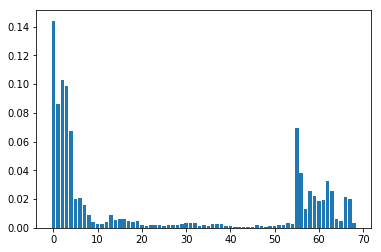

In [26]:
from matplotlib import pyplot
# plot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

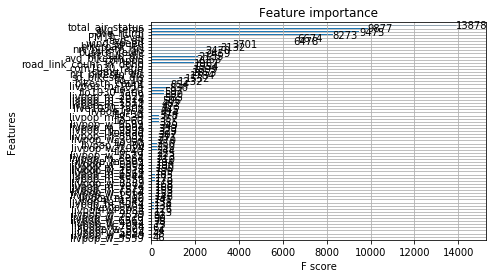

In [29]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb) #weight
pyplot.show()

#### feature selection

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    rmse = ((y_pred - y_test)**2).mean()**0.5
    
    #print("Thresh=%.3f, n=%d, rmse: %.2f" % (thresh, select_X_train.shape[1], rmse))

In [ ]:
from sklearn.metrics import r2_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    
    r_squared = r2_score(y_test,y_pred,multioutput='variance_weighted')
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_pred)-1)/(len(y_pred)-2)
    
    
    #print("Thresh=%.3f, n=%d, a_r2: %.2f" % (thresh, select_X_train.shape[1], adjusted_r_squared))
    print(r_squared,adjusted_r_squared)

#### CV

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_X = selection.transform(X)
    # train model
    selection_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
    selection_model.fit(select_X, y)
    # eval model
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scoring = 'r2'
    
    results = model_selection.cross_val_score(selection_model, select_X, y, cv=kfold, scoring=scoring)
    print(("R^2: %.3f (%.3f)") % (results.mean(), results.std()))

#### parameters search

In [ ]:
import pprint
from sklearn.grid_search import GridSearchCV
def xgb_model_select(X_train,y_train):  
    xgb_clf = xgboost.XGBRegressor()
    parameters = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
    } # []안의 값 각각 수정가능(개수제한 없음)
    grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=10, n_jobs=-1)
    print("parameters:")
    pprint.pprint(parameters)
    grid_search.fit(X_train, y_train)
    print("Best score: %0.3f" % grid_search.best_score_) #best score 기준 최적 parameter search
    print("Best parameters set:")
    best_parameters=grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    end_time = datetime.datetime.now()
    print ('Select Done..., Time Cost: %d') % ((end_time - start_time).seconds)

#### prediction

In [30]:
xgb.predict(X)

array([ 0.05398014, -0.00555915, -0.11170602, ...,  0.03352678,
        0.11889243,  0.9797745 ], dtype=float32)